# Group members
 1. **Manish Kumar Thota** : 800756541
 2. **Deepa Paikar**  : 800756563
 3. **Kanchan Maurya**  : 800756540

### Tasks in Assignment are as followed:
1. Download the review_polarity.tar.gz file to your local environment and decompress its contents. The
compressed file contains two directories: neg which contains 1000 negative movie reviews; and pos
which contains 1000 positive movie reviews.

2. Load the neg and pos directories to your AIM 5001 Github Repository. You need to keep the content of
the directories separated since the directories themselves serve as the labels for the classification of
the reviews.

3. Then, using a Jupyter Notebook, construct an algorithm (DO NOT USE scikit-learn COUNTVECTORIZER)
that will read the content of each individual movie review from your new Github directories and
convert that content into a properly labeled (i.e., POS / NEG or some appropriate proxy thereof) entry
within a Pandas dataframe that encompasses all of the possible words contained within the 2000
movie reviews. When finished, the contents of your Pandas dataframe will constitute a term-document
matrix for the movie review data. While constructing this term-document matrix within your Pandas
dataframe, you should ensure that you remove any punctuation or stop words from the reviews. How
you choose to manage the construction and proper labeling of the term-document matrix is up to you
as the text mining / Python practitioner to decide.

4. Convert the cumulative frequency count data content of your newly created Pandas dataframe into a
NumPy array.

5. Using the NumPy array, calculate the sparsity of the term-document matrix. What percentage of the
entries in your term-document matrix contain zeroes?

6. Next, using the content of the Pandas dataframe, plot the frequency distribution for the 30 words
which occur most frequently in the positive reviews. What insights can you derive from the plot?

7. Then, once again using the content of the Pandas dataframe, plot the frequency distribution for the 30
words which occur most frequently in the negative reviews. What insights can you derive from the
plot?

8. Now that you have successfully constructed and properly labeled the term-document matrix entries
for each of the 2000 individual movie reviews, randomly sample 75% of the vectors contained within
the term-document matrix for use as a model training data subset while leaving the remaining 25% of
the vectors for the model testing data subset. How you choose to split the data is up to you as the data
science / Python practitioner to decide. Be sure to display samples of your training and testing subsets
to a reader of your work. Also, tell us how many documents are contained within your training subset?
How many documents are contained in your testing subset? How many positive and negative reviews
are contained within each subset? Does the mix of positive and negative reviews appear to be
relatively balanced within each of the subsets? Be sure to provide a suitable explanatory narrative in
the form of formatted Markdown cells.

# 1. Introduction

1. Sentiment analysis is a commonly used technique for detecting the underlying sentiment, or emotional tone, in a piece of text. This technique categorizes text sentiment as positive, negative, or neutral.

2. Many organizations use sentiment analysis algorithms to understand the opinions of both current and potential customers, including those in the film industry.

3. One of the most common applications of sentiment analysis is in social media monitoring, where companies use it to track and analyze customer feedback on social media platforms such as Twitter, Facebook, and Instagram. By analyzing social media posts, companies can gauge customer satisfaction, identify customer pain points, and track the success of marketing campaigns in real-time.

4. Sentiment analysis is also widely used in the film industry, where movie studios use it to analyze audience reactions and determine the success of their films. By analyzing reviews and comments from moviegoers, studios can gain insights into the strengths and weaknesses of their movies and adjust their marketing strategies accordingly.

5. Other applications of sentiment analysis include political analysis, market research, brand management, and customer service. In the political realm, sentiment analysis is used to analyze public opinion on political issues and candidates, and inform political campaigns. In market research, it helps companies understand consumer preferences and inform product development. In customer service, sentiment analysis can help identify customer problems and improve customer support.

In this project, we will be focusing on sentiment analysis for movie reviews using data from http://www.cs.cornell.edu/people/pabo/movie-review-data/.

To perform effective sentiment analysis, we need to take the following steps:

- **Import the Natural Language Toolkit (NLTK) library**
- **Tokenize the words in the text**
- **Remove any punctuation marks**
- **Eliminate stop words (common words such as "the," "and," "a," etc.)**
- **Perform sentiment analysis on the remaining text**

In [1]:
# # Importing necessary libraries 
import re
import nltk
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import time


nltk.download("all")

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]    | 

In [2]:
#unzipping the data that is downloaded

# importing the "tarfile" module
import tarfile

# open file
file = tarfile.open('review_polarity.tar.gz')
  
# extracting file
file.extractall('./review_polarity')
  
file.close()

# 2. Data Preparation & Cleaning 

### Approach


1. Import the necessary libraries:
2. requests: to send HTTP requests and retrieve the response
3. BeautifulSoup: to parse the HTML data
4. pandas: to create and manipulate data in a DataFrame
5. Define a function get_file_names(url) that takes a URL as an argument, retrieves the HTML data from the URL, and returns a list of file names with the .txt extension found in the HTML text.
6. Define the URLs where the negative and positive movie reviews are stored.
7. Call the get_file_names(url) function for both URLs to retrieve the file names for the negative and positive movie reviews.
8. Fetch the positive and negative reviews by sending a GET request to the URL where the reviews are stored and retrieve the text content of each file.
9. Append the text content and label "Pos" or "Neg" to separate lists for positive and negative reviews.
10. Create a DataFrame for reviews by concatenating the positive and negative reviews using Pandas DataFrame() method.
11. Reset the index of the DataFrame and drop the "index" column.
12. Display the first few rows of the DataFrame using the head() method.
13. Analyze the data to gain insights or train a machine learning model.
14. The stopwords.words('english') method is used to create a list of English language stop words.
15. The remove_stop_punc(sent) function is defined. This function takes a sentence as input, converts it to lowercase, tokenizes it, and removes stop words and punctuations from the tokenized words using the stop words list created in step 2.The function returns a list of cleaned words.
16. The remove_stop_punc function is then applied to each review in the DataFrame using the apply method and the cleaned reviews are stored in the 'Review' column of the same DataFrame.
17. Finally, the time taken to remove stop words and punctuations is calculated and printed.


# Fecthing the file names from the Github directory

In [3]:
def get_file_names(url):
    """
    This function takes a URL as an argument, retrieves the HTML data from the URL, and returns a list of file names 
    with the .txt extension found in the HTML text.
    """
    result = requests.get(url)  # Send a GET request to the URL to retrieve the HTML data

    soup = BeautifulSoup(result.text, 'html.parser')  # Parse the HTML data using BeautifulSoup

    # Find all the elements with the title attribute containing .txt using regular expressions
    txt_files = soup.find_all(title=re.compile("\.txt"))

    # Extract the text from each element, and add it to a list of file names
    file_names = []
    for file in txt_files:
        file_names.append(file.extract().get_text())

    return file_names  # Return the list of file names

# Define the URLs where the negative and positive movie reviews are stored
neg_url = 'https://github.com/ManishKumarYeshiva/Data-Acquisition-Management/tree/main/review_polarity/txt_sentoken/neg'
pos_url = 'https://github.com/ManishKumarYeshiva/Data-Acquisition-Management/tree/main/review_polarity/txt_sentoken/pos'

# Retrieve the file names for the negative and positive movie reviews using the get_file_names function
positive_files = get_file_names(pos_url)
negative_files = get_file_names(neg_url)

# Check the total number of files retrieved by adding the lengths of the positive and negative file lists
total_files = len(positive_files) + len(negative_files)

# Print the total number of files retrieved using formatted text
print("The total number of movie review files retrieved is {}.".format(total_files))

The total number of movie review files retrieved is 2000.


### Fetching the reviews from Github repository.

In [ ]:
# Fetching Positive Reviews
positive_reviews = []

for file_name in positive_files:
    # Send a GET request to the URL where the positive reviews are stored to retrieve the text content of each file
    response = requests.get(f'https://github.com/ManishKumarYeshiva/Data-Acquisition-Management/tree/main/review_polarity/txt_sentoken/pos/{file_name}')
    # Append the text content and label "Pos" to the positive_reviews list
    positive_reviews.append([response.text, "Pos"])

# Fetching Negative Reviews
negative_reviews = []

for file_name in negative_files:
    # Send a GET request to the URL where the negative reviews are stored to retrieve the text content of each file
    response = requests.get(f'https://github.com/ManishKumarYeshiva/Data-Acquisition-Management/tree/main/review_polarity/txt_sentoken/neg/{file_name}')
    # Append the text content and label "Neg" to the negative_reviews list
    negative_reviews.append([response.text, "Neg"])

# Create dataframe that provides all movie reviews

In [20]:
# Creating a DataFrame for Reviews
reviews_df = pd.DataFrame(negative_reviews, columns=["Review", "Sentiment"]).append(pd.DataFrame(positive_reviews, columns=['Review','Sentiment']))
# Reset the index
reviews_df.reset_index(inplace=True)
# Drop the index column
reviews_df.drop("index", axis=1, inplace=True)
# Display the first few rows of the DataFrame
reviews_df.head()

,Review,Sentiment
0,"plot : two teen couples go to a church party ,...",Neg
1,the happy bastard's quick movie review \ndamn ...,Neg
2,it is movies like these that make a jaded movi...,Neg
3,""" quest for camelot "" is warner bros . ' firs...",Neg
4,synopsis : a mentally unstable man undergoing ...,Neg


1. **Stop Words removal**
2. **Punctuation Removal**

- The stopwords module from the NLTK library contains a list of common words that are often considered "stopwords" in natural language processing. These are words that are frequently used in language, but do not carry much meaning or significance in text analysis, such as "a", "an", "the", "is", "and", "or", etc.

- By calling stopwords.words('english'), we can retrieve a list of stopwords specifically for the English language, which can be useful for text cleaning and analysis purposes.

In [21]:
en_stops = stopwords.words('english')

## Part 1: Removing stop words and punctuation.

In [43]:
def remove_stop_punc(sent):
    ''' 
    This function removes Englsih language stop words and punctuations from
    a provided list of reviews.
    '''

    # define a new list to store the words we will retain from the 'words' list
    words_clean = []
    words=word_tokenize(sent.lower())
    
    for word in words:

    #filter from stop words and punctuation
    #NLTK word tokenizer accepts '' as ``, but we do not need it also
        if word not in en_stops and word.isalpha():
            words_clean.append(word)
    return words_clean
     

In [44]:

# Apply remove_stop_punc function to each review in the DataFrame
start = time.time()
reviews_df['Review'] = reviews_df['Review'].apply(remove_stop_punc)
end = time.time()
print("Time taken to remove stop words and punctuation:", end - start, "seconds")
reviews_df.head()

Time taken to remove stop words and punctuation: 5.227021932601929 seconds


,Review,Sentiment
0,"[plot, two, teen, couples, go, church, party, ...",Neg
1,"[happy, bastard, quick, movie, review, damn, b...",Neg
2,"[movies, like, make, jaded, movie, viewer, tha...",Neg
3,"[quest, camelot, warner, bros, first, attempt,...",Neg
4,"[synopsis, mentally, unstable, man, undergoing...",Neg


# 3. Calculate Matrix Sparsity 

### Approach

1. The corpus variable is created by exploding the 'Review' column of the DataFrame.
2. The np.unique() method is used to get unique words and their corresponding counts in the first review.
3. The positive_files and negative_files lists are created by concatenating the file names retrieved using the get_file_names() function.
4. The np.unique() method is used to get unique words in the 'Review' column of the DataFrame.
5. The term_document_matrix DataFrame is created with rows indexed by unique words and columns indexed by review indices. The DataFrame is initialized with 0s.
6. A loop is used to populate the term document matrix. For each review, a pandas series is created with word counts. The value_counts() method is used to count the number of times each word appears in the review. The series is used to populate the appropriate columns of the term document matrix.
7. Finally, the time taken to create the term document matrix is calculated using the %%time magic command and printed.
8. Convert the term-document matrix term_document_matrix to a numpy array using the to_numpy() method and assigns it to the variable tdm.
9. Calculate the sparsity of the TDM by first counting the number of nonzero elements in the array using the np.count_nonzero() method, and then dividing it by the total number of elements in the array using the tdm.size attribute.




In [50]:
corpus = reviews_df.Review.explode(ignore_index=True)
     
vals, counts  = np.unique(reviews_df.Review[0], return_counts=True)

all_files = []
all_files.extend(positive_files)
all_files.extend(negative_files)

unique_words = np.unique(reviews_df['Review'].explode(ignore_index=True))
term_document_matrix = pd.DataFrame(index = unique_words, columns = reviews_df.index ).fillna(0)
term_document_matrix.fillna(0, inplace=True)
     

term_document_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaahhhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
%%time
for i,j in enumerate(reviews_df.Review):
    vl_count=pd.Series(j).value_counts()

    term_document_matrix.loc[term_document_matrix.index.isin(list(vl_count.index)),TDM.columns[i]]= list(vl_count.values)

term_document_matrix.head()

Wall time: 17 s


,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaahhhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Part 2: Sparsity of the Term Document matrix

In [52]:
tdm = term_document_matrix.to_numpy()
sparsity = 1.0 - ( np.count_nonzero(tdm) / tdm.size)
sparsity

0.993218544965877

### Inference : 
- The resulting sparsity value indicates the proportion of zero elements in the matrix and can be used as a measure of the density of the matrix.
- In above case, the calculated sparsity value is 0.993218544965877, indicating a very high level of sparsity in the matrix.

# 4. Frequency Distribution Plots

### Approach

1. Load the corpus and create a frequency distribution of all words using the FreqDist function from the nltk library.
2. Sort the frequency distribution in descending order by value and get the top 30 words.
3. Create a bar plot using the top 30 words and their frequencies using the matplotlib library. Show the plot.
4. Create separate frequency distributions for positive and negative reviews.
5. Sort the frequency distributions in descending order by value and get the top 30 words for each sentiment.
6. Create separate bar plots for the top 30 words and their frequencies for positive and negative reviews using the matplotlib library and show the plots.

# Frequency of the top 30 words from the complete Document.


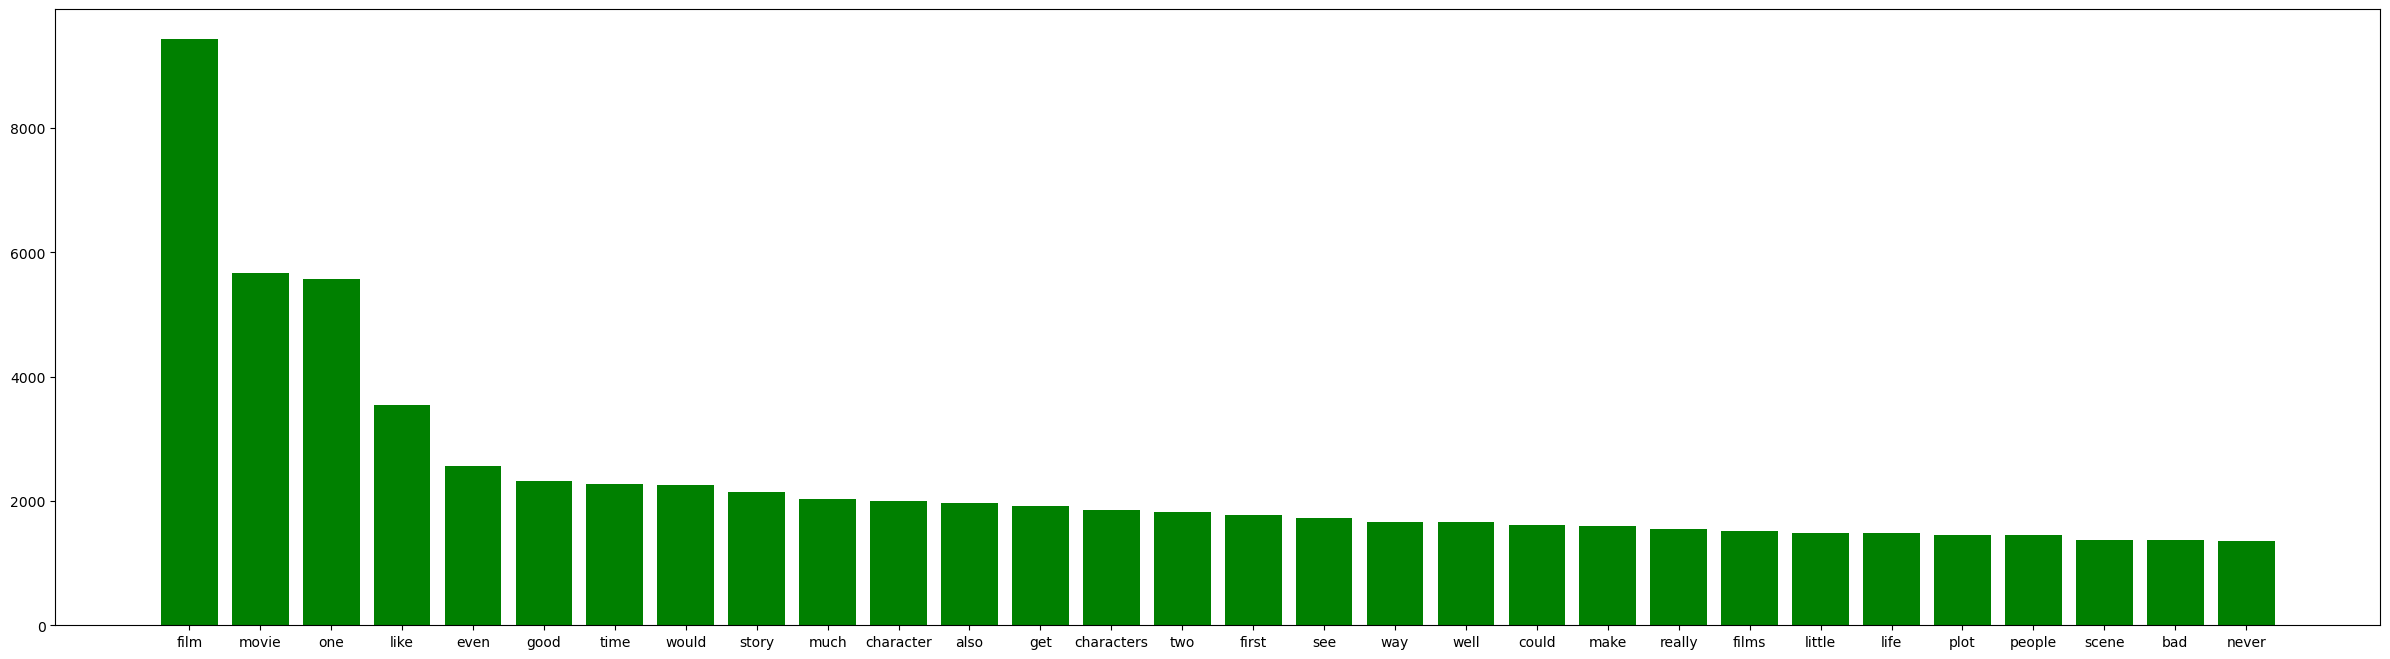

In [59]:
from nltk import FreqDist

# set the figure size
plt.figure(figsize=(30,8))

# get the frequency distribution of all words in the corpus
all_words_frequency = dict(FreqDist(corpus))

# sort the frequency distribution in descending order by value and get the top 30
sorted_dict = dict(sorted(all_words_frequency.items(), key=lambda x: x[1], reverse=True)[:30])

# create a bar plot using the top 30 words and their frequencies
plt.bar(list(sorted_dict.keys()), list(sorted_dict.values()), color='green')

# show the plot
plt.show()


#### Inference : 
- The output of the code shows a bar plot with the top three most common words being "film", "movie", and "one". The last three words on the plot are "seen", "bad", and "never", indicating that these words have low frequency in the whole document.

#### Conclusion: 
- The code provides a quick and easy way to visualize the frequency distribution of the top 30 most common words in a given corpus using NLTK and Matplotlib. 
- The resulting plot can be used to gain insights into the most frequent words in the corpus, which can be useful for various natural language processing tasks such as text classification, sentiment analysis, and topic modeling

# Frequency of the top 30 words which has Positive sentiments.

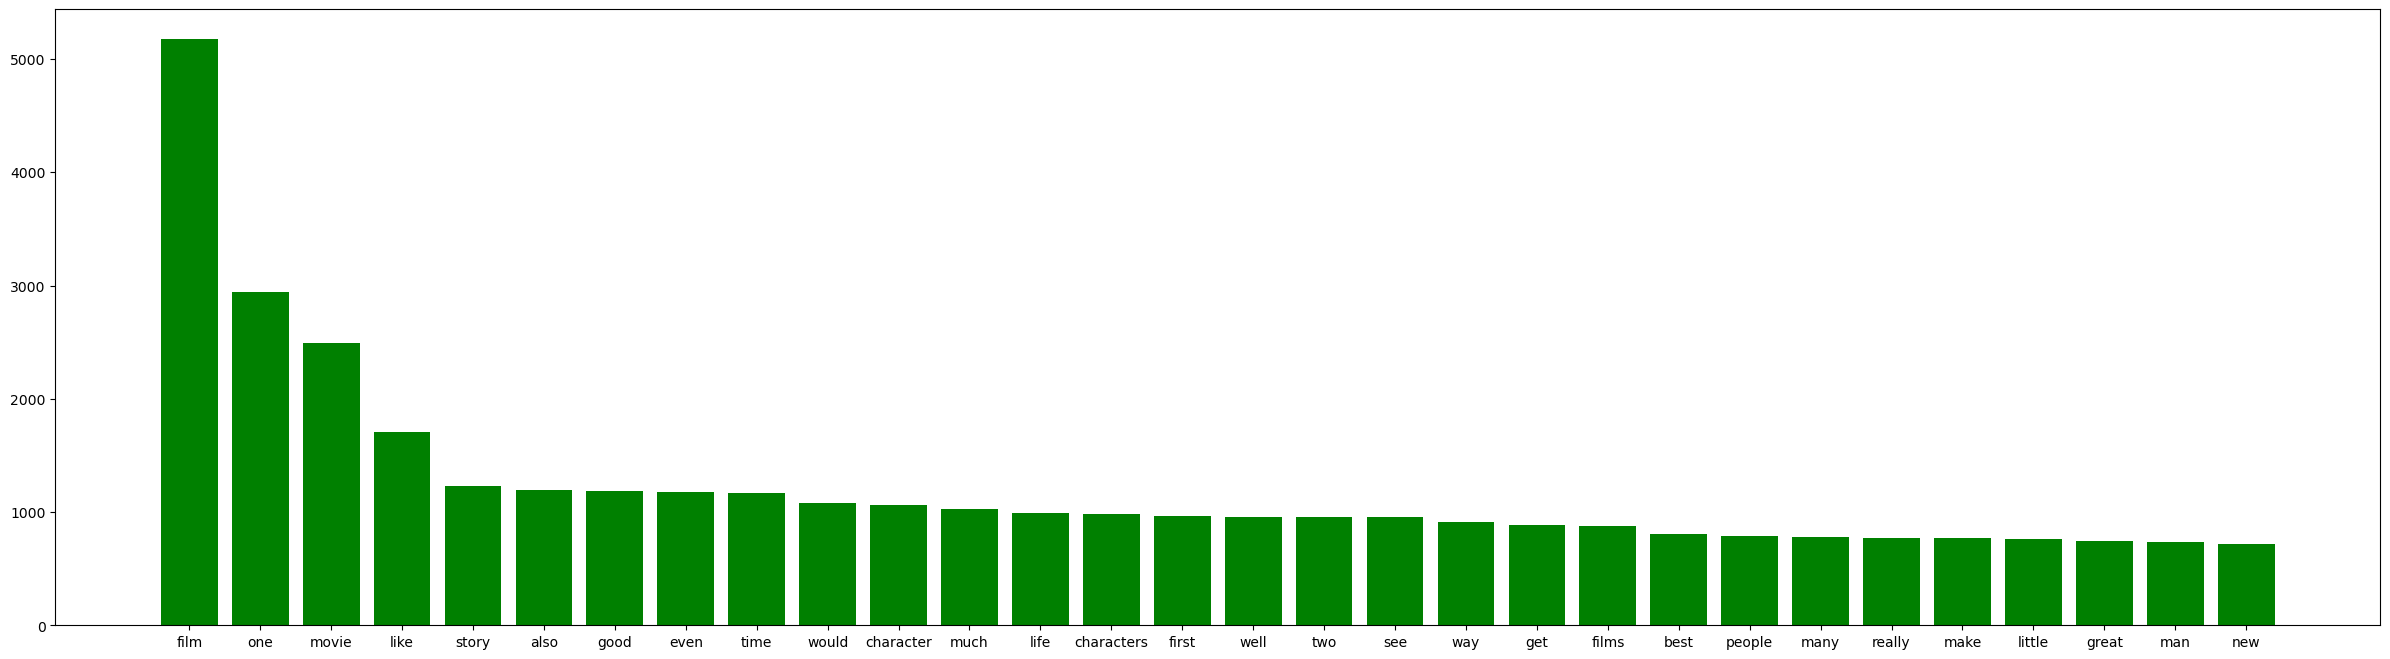

In [61]:
plt.figure(figsize=(30,8))

pos_words_frequency = dict(FreqDist(reviews_df[reviews_df.Sentiment == "Pos"].Review.explode()))
sorted_dict = dict(sorted(pos_words_frequency.items(), key = lambda x:x[1], reverse=True))
plt.bar(list(sorted_dict.keys())[:30], list(sorted_dict.values())[:30], color='green')
plt.show()


#### Inference : 
- The output of the code shows a bar plot with the top three most common words with positive sentiment being "film", "movie", and "one". 
- The last three words on the plot are "great", "man", and "new", indicating that these words have a high frequency in the reviews dataset with positive sentiment.

#### Conclusion:
- The code provides a quick and easy way to visualize the frequency distribution of the top 30 most common words with positive sentiment in a given reviews dataset using NLTK and Matplotlib.
- The resulting plot can be used to gain insights into the most frequent words in the reviews dataset with positive sentiment, which can be useful for sentiment analysis and opinion mining tasks.

# Frequency of the top 30 words which has Negative sentiments.

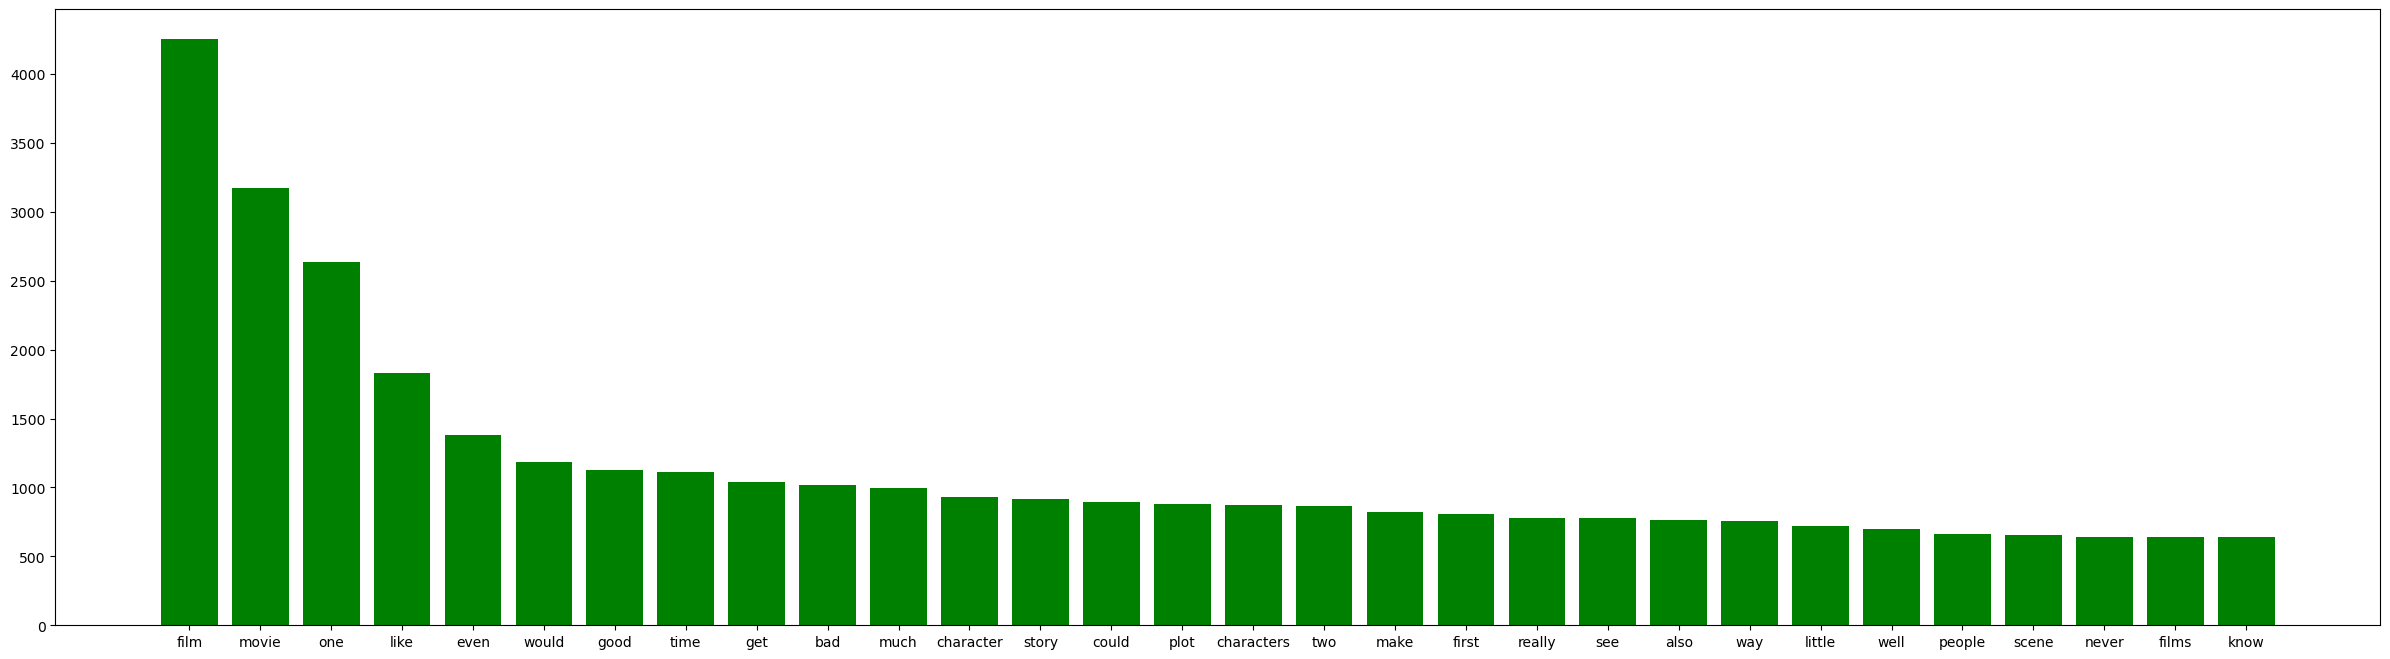

In [62]:
plt.figure(figsize=(30,8))

neg_words_frequency = dict(FreqDist(reviews_df[reviews_df.Sentiment == "Neg"].Review.explode()))
sorted_dict = dict(sorted(neg_words_frequency.items(), key = lambda x:x[1], reverse=True))
plt.bar(list(sorted_dict.keys())[:30], list(sorted_dict.values())[:30], color='green')
plt.show()

#### Inference : 
- The output of the code shows a bar plot with the top three most common words with negative sentiment being "film", "movie", and "one". 
- The last three words on the plot are "never", "films", and "know", indicating that these words have a high frequency in the reviews dataset with negative sentiment.

#### Conclusion:
- The code provides a quick and easy way to visualize the frequency distribution of the top 30 most common words with negative sentiment in a given reviews dataset using NLTK and Matplotlib. 
- The resulting plot can be used to gain insights into the most frequent words in the reviews dataset with negative sentiment, which can be useful for sentiment analysis and opinion mining tasks.

# 5. Sentiment Analysis Model Preparation 
- Splitting the term document matrix into Training, Testing, validation sets.

### Approach

1. The function split_random() takes a matrix (as a pandas DataFrame) and splits it into training, testing, and validation sets based on provided percentages.
2. The percentages are passed as arguments to the function, with the default values for percent_train and percent_test being 70% and 15% respectively.
3. The function calculates the percentage of validation set based on the provided percent_train and percent_test values.
4. The function checks whether the sum of percent_train and percent_test is less than or equal to 100%, and raises an error message if it's greater than 100%.
5. The function shuffles the columns of the input DataFrame randomly.
6. The function calculates the number of columns to be included in the training and testing sets based on the provided percentages.
7. The function splits the shuffled DataFrame into training and testing sets.
8. The function returns the training and testing DataFrames.
9. The train_df and test_df variables are assigned the values returned by the split_random() function.
10. The head() method is used to display the first few rows of train_df and test_df.1
11. The reviews_df DataFrame is filtered by selecting only the columns that are present in the training set, and the value_counts() method is used to count the number of positive and negative sentiments in the training set.
12. The resulting count is plotted using sns.barplot().
13. The same process is repeated for the testing set, and the resulting counts are plotted as well.






In [ ]:
def split_random(df, percent_train=70, percent_test=15):
    """
    Splits matrix data into randomly ordered sets 
    grouped by provided percentages.

    percent_validation 10
    training (80, 2)
    testing (10, 2)
    validation (10, 2)

    Returns:
    - training_data: percentage_train e.g. 70%
    - testing_data: percent_test e.g. 15%
    - validation_data: reminder from 100% e.g. 15%
    """

    percent_validation = 100 - percent_train - percent_test

    if percent_validation < 0:
        print("Make sure that the provided sum of training and testing percentages is equal, or less than 100%.")
        percent_validation = 0
    else:
        print("percent_validation:", percent_validation)

    columns = df.shape[1]

    # shuffle by columns
    shuffled = df.sample(frac=1, axis=1)

    end_training = int(columns * percent_train / 100)
    end_testing = end_training + int((columns * percent_test / 100))

    training = shuffled.iloc[:, :end_training]
    testing = shuffled.iloc[:, end_training:]

    print("Training shape:", training.shape)
    print("Testing shape:", testing.shape)
    
    return training, testing


train_df, test_df = split_random(TDM, percent_train=80, percent_test=20) 



### Training Dataset

In [68]:
train_df.head()

,1126,1067,643,1898,1554,1343,1534,1078,748,581,...,541,39,1296,104,65,931,1112,959,740,1520
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaahhhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Test Dataset

In [69]:
test_df.head()

,383,1566,1132,1625,1274,319,1879,1223,1856,837,...,1728,448,1971,741,734,887,676,844,188,766
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaahhhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Define quantity of positive and negative reviews are contained within each subset

### Quantity of positive and negative reviews in trainig dataset

In [70]:
reviews_df.index.isin(list(training.columns))

array([ True,  True, False, ...,  True,  True,  True])

In [71]:
result_1=reviews_df['Sentiment'][reviews_df.index.isin(list(training.columns))].value_counts()
result_1

Neg    810
Pos    790
Name: Sentiment, dtype: int64

<AxesSubplot:>

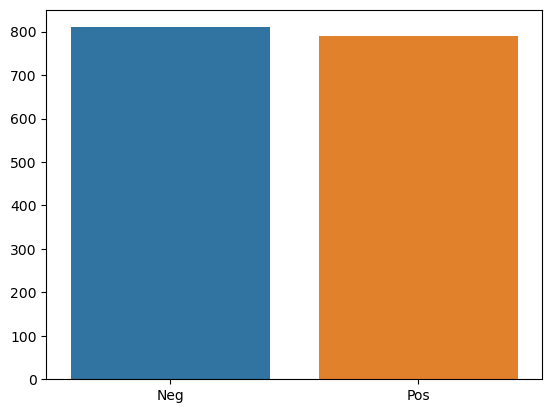

In [72]:
sns.barplot(x=result_1.index,y=result_1.values)

#### Inference :
- The output of the code shows that there are 810 negative sentiment reviews and 790 positive sentiment reviews in the dataset, as indicated by the "Neg 810" and "Pos 790" values.

#### Quantity of positive and negative reviews in testing dataset

In [73]:
result_2=reviews_df['Sentiment'][reviews_df.index.isin(list(testing.columns))].value_counts()
result_2

Pos    210
Neg    190
Name: Sentiment, dtype: int64

<AxesSubplot:>

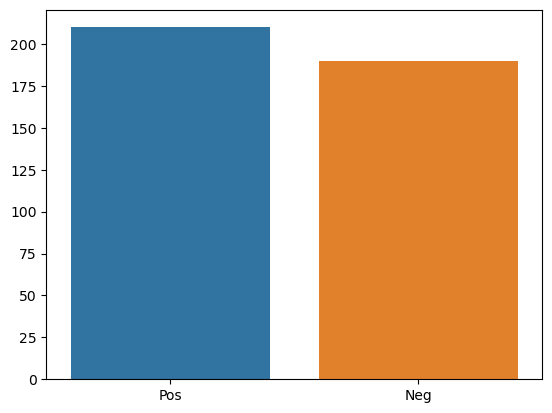

In [74]:
sns.barplot(x=result_2.index,y=result_2.values)

#### Inference :
- The output of the code shows that there are 210 positive sentiment reviews and 190 negative sentiment reviews in the testing dataset, as indicated by the "Pos 210" and "Neg 190" values
- In training and testing datasets We have almost the same size of positive and negatives samples in our dataset, hence we can say that our subsets are balanced
